# XOR gate implementation using MLP (Multi-Layer Perceptron)

# Network Structure:
- Input Layer: 2 neurons (for two input features)
- Hidden Layer: 4 neurons (with ReLU activation function)
- Output Layer: 1 neuron (with Sigmoid activation for binary classification)

# XOR Truth Table:

Input  | Output

0  0   | 0

0  1   | 1

1  0   | 1

1  1   | 0

Import necessary libraries

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

 Define XOR input and output

In [2]:
data = np.array([[0,0], [0,1], [1,0], [1,1]])
labels = np.array([[0], [1], [1], [0]])

Create the MLP model

In [3]:
model = Sequential([
    Dense(4, activation='relu', input_shape=(2,)),  # Hidden layer with 4 neurons
    Dense(1, activation='sigmoid')  # Output layer with 1 neuron
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compile the model
Binary cross-entropy loss function: L = - (y log(p) + (1 - y) log(1 - p))

Optimizer: Adam (adaptive moment estimation)

In [4]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Train the model and store history for visualization

In [5]:
history = model.fit(data, labels, epochs=500, verbose=1)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7500 - loss: 0.6734
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7500 - loss: 0.6732
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.7500 - loss: 0.6730
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7500 - loss: 0.6728
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.7500 - loss: 0.6726
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.7500 - loss: 0.6724
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7500 - loss: 0.6722
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.7500 - loss: 0.6720
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.7500 - loss: 0.6718
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.7500 - loss: 0.6716
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.7500 - loss: 0.6714
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.7500 - loss

Plot the training loss curve

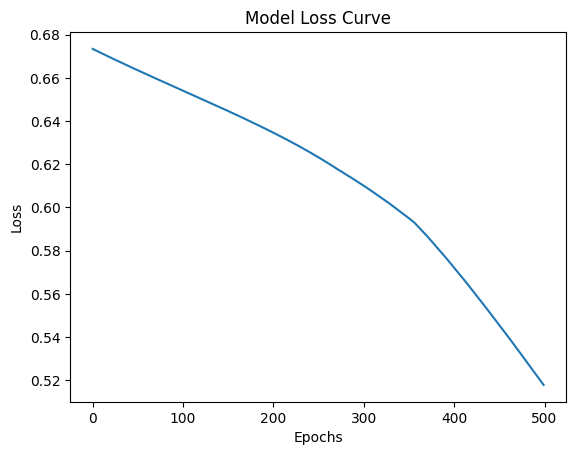

In [6]:
plt.plot(history.history['loss'])
plt.title('Model Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

Evaluate the model

In [7]:
predictions = model.predict(data)
print("Predictions:")
print(np.round(predictions))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Predictions:
[[0.]
 [1.]
 [1.]
 [0.]]


Visualizing the decision boundary

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


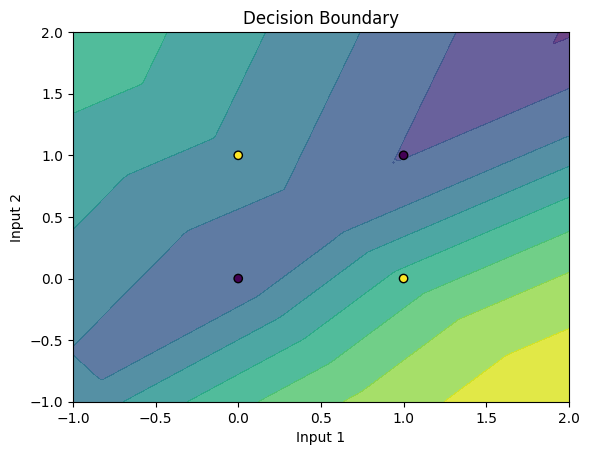

In [8]:
def plot_decision_boundary(model, data, labels):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    grid = np.c_[xx.ravel(), yy.ravel()]
    predictions = model.predict(grid).reshape(xx.shape)

    plt.contourf(xx, yy, predictions, alpha=0.8)
    plt.scatter(data[:, 0], data[:, 1], c=labels.flatten(), edgecolors='k')
    plt.title('Decision Boundary')
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.show()

plot_decision_boundary(model, data, labels)